**Assignment 2**

*Part 1*

---



### **Data Engineers   |   Data Analysts   |   Data Scientists**

**Data Engineer**

> A data engineer can also be described as a data developer. They work mainly in the backend development of data systems. This involves designing code to help manipulate data. For example, taking in big data from many sources and write code which would select the most important and change it into useable data, which can later be used, and changed, to help visualize it.

**Data Analyst**

> A data analyst takes a data set and analyzes it . The analysis can then be used to answer questions. It can also be used to make conclusions depending on the way it is presented. They use vizualisation such as graphs and charts to show what the findings are.  

**Data Scientist**

> Data scientists can be described as a mixture of expert data engineers and data analysts. They solve the most complicated problems. This is done by firstly examing data, designing solutions using the same steps a data engineer would, implement the solutions the same way a data analyst would and finally present their findings. This is a very important role because it involves taking in unstructured raw data and turning it into valuable and meaningful information which can later be used for decision making.

Ref(Data Scientist vs Data Analyst: What's the difference?, 2019)


### **Generators vs Return**

**Return**

> Return is usually seen at the end of a funtion. For example, if a function is written to iterate over a set of data such as a string or a list, it will process every single item. When it returns an outcome it will store in memory the same number of items as the number of iterations.

**Generators**

> Generators allow you to declare a function that will behave as an iterator. This is different to the function mentioned above as the number of iterations is limited. When looping over a generator it will be focused only on the item it is on and after moving to the next one it forgets the previous. It stores the logic of the function, and therefore not a lot of memory is being used. 

**Which is better?**

> When dealing with big data, using a generator is definitely the better option. Using a funtion with a return statement will use a lot of memory as it stores a lot of values and takes a long time to run because it will return all the data back. Generators store only the logic, therefore using less memory and return only the values you are interested in by using yield instead of return. Yield will not stop processing until the desired data is found giving a clearer outcome. 


*Part 2*

---



### **Exploratory Data Analysis (EDA)**

**Why EDA?**

> EDA is a way in which data analysis can be performed on a data set. It helps you see data in a understandable form such as graphical. EDA can help you prove certain observations and predict future patterns. There are two types of strategies that can be performed using EDA. Graphical (histograms, bee swarms) and statistical (standard deviation, mean). Different strategies match different data sizes. For example if you have a low number of classes and a bigger number of points a histogram would be better, and if you have a bigger number of classes than points a bee swarm plot would be more suitable. The graphical EDA is also very helpful in identifying areas of confusion or overlap within a data set. The statistical EDA is helpful to see the outliers.


*Part 3*

---



### **Iris Dataset**

In [74]:
#import libraries
#sklearn for machine learning - will bring all data sets that are in there
from sklearn import datasets 
#seaborn
import seaborn as sns
#pandas data frame
import pandas as pd
#plotting library
import matplotlib.pyplot as plt
#numpy
import numpy as np

In [75]:
#load the iris data set
iris = datasets.load_iris()

In [76]:
#show the information in this data set
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [77]:
#show a description of the data set
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### **Strategies**

**Strategy 1 : Graphical - Bee Swarm Plot**

*Purpose:*

Display a clear separation of the data points in each class where differences and overlaps can be clearly seen.

*Benefit:* 

Shows exact petal width sizes where an overlap exists between classes.

*Observation/Interpretation:*

There is an overlap in classes Virginica and Versicolour from around 1.4cm until 1.8cm.


In [78]:
#function that uses 0, 1 and 2 as indicators for each class
def simple_fn_test(x): 
  d = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
  return d[x]

In [79]:
#creating a dataframe 
#input variables or predicters - all the data is loaded as X
X = iris.data 

#plant species - all the targets as y
y = iris.target

#want to call the column names for corresponding x whichever are the feature names
df = pd.DataFrame(X, columns=iris.feature_names)

#create a deep copy of this dataframe 
full_df = df.copy(deep=True) 

#assign a new column to this data frame called target and set the value from y
full_df['Target']=y

#create a new column and apply simple_fn_test
full_df['Target_Text'] = full_df.Target.apply(simple_fn_test) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


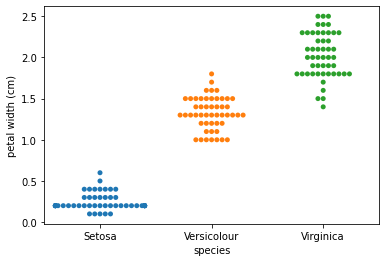

In [80]:
#create a bee swarm plot 
# data is coming from full_df - full data from df but select only petal width
_ = sns.swarmplot(x='Target_Text', y='petal width (cm)', data=full_df) 

#axis labels
_ = plt.xlabel('species')
_ = plt.ylabel('petal width (cm)')

#show the plot
plt.show()

**Strategy 2: Graphical - Empirical Distribution Function (ECDF)**

*Purpose:* 

Use probability distribution to plot out the points and make observations.

*Benefit:* 

Shows a ordered graph which can be used to see the exact percentage related to the overlap.

*Observation/Interpretation:*

Almost 40% of versicolor and 30% of virginica is involved in the overlap.

In [81]:
#ECDF
def ecdf(data):
  #n = number of data points
  n = len(data) 

  #x = sorted data points
  x = np.sort(data) 

  #y = calculate the range of all the points and divide by the number of points to get y
  y = np.arange(1, n+1) / n 

  return x, y

In [82]:
#filter the data set into parts you are interested in - ie. petal width

#Setosa
setosa_petal_width = full_df[full_df['Target'] == 0]['petal width (cm)']

#Versicolour
versicolor_petal_width = full_df[full_df['Target'] == 1]['petal width (cm)']

#Virginica
virginica_petal_width = full_df[full_df['Target'] == 2]['petal width (cm)'] 

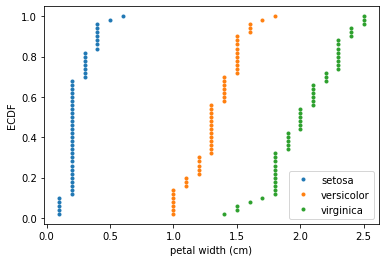

In [83]:
#compute ecdfs for all the species
x_set, y_set = ecdf(setosa_petal_width) 
x_ver, y_ver = ecdf(versicolor_petal_width)
x_vir, y_vir = ecdf(virginica_petal_width)

#plot the ecdfs 
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_ver, y_ver, marker='.', linestyle='none')
plt.plot(x_vir, y_vir, marker='.', linestyle='none')

#labels
#loc is location of the box
plt.legend(('setosa', 'versicolor', 'virginica'), loc = 'lower right') 
_ = plt.xlabel('petal width (cm)')
_ = plt.ylabel('ECDF')

#show the plot
plt.show()

**Strategy 3: Statistical - Mean and Median**

*Purpose:*

Show if the mean is affected by outliers by comparing to the median which will show the exact middle of the data set.

*Benefit:* 

Can distinguish where outliers are and if there are any.

*Observation/Interpretation:*

There isn't a huge noticeable difference between the mean and the median meaning there arent many outliers for Versicolor and Virginica, however, there is a noticeable difference for Setosa meaning there are a few outliers for that class. 

Mean: Setosa: 0.2459999999999999 cm
Median: Setosa: 0.2 cm


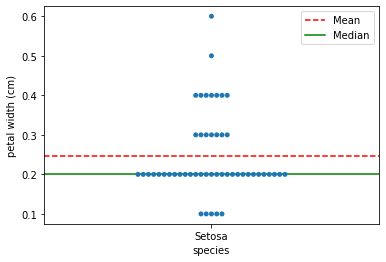

Mean: Versicolor: 1.3259999999999998 cm
Median: Versicolor: 1.3 cm


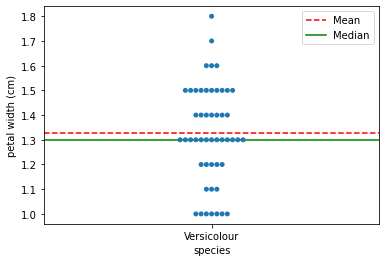

Mean: Virginica: 2.026 cm
Median: Virginica: 2.0 cm


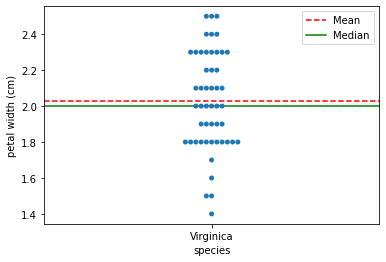

In [84]:
#find the mean and median for setosa
mean_width_set = np.mean(setosa_petal_width)
median_width_set = np.median(setosa_petal_width)

#print the results
print('Mean: Setosa:', mean_width_set, 'cm')
print('Median: Setosa:', median_width_set, 'cm')

#create bee swarm plot 
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='petal width (cm)', data=full_df[full_df['Target_Text'] == 'Setosa'])
ax.axhline(mean_width_set, color='r', linestyle='--')
ax.axhline(median_width_set, color='g', linestyle='-')

#add the legend
plt.legend({'Mean':mean_width_set, 'Median':median_width_set})

#label the axis
_ = plt.xlabel('species')
_ = plt.ylabel('petal width (cm)')

#show the plot
plt.show()

#find the mean and median for versicolour
mean_width_ver = np.mean(versicolor_petal_width)
median_width_ver = np.median(versicolor_petal_width)

#show the plot
print('Mean: Versicolor:', mean_width_ver, 'cm')
print('Median: Versicolor:', median_width_ver, 'cm')

#create bee swarm plot
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='petal width (cm)', data=full_df[full_df['Target_Text'] == 'Versicolour'])
ax.axhline(mean_width_ver, color='r', linestyle='--')
ax.axhline(median_width_ver, color='g', linestyle='-')

#add the legend
plt.legend({'Mean':mean_width_ver, 'Median':median_width_ver})

#label the axis
_ = plt.xlabel('species')
_ = plt.ylabel('petal width (cm)')

#show the plot
plt.show()

#find the mean and median for virginica
mean_width_vir = np.mean(virginica_petal_width)
median_width_vir = np.median(virginica_petal_width)

print('Mean: Virginica:', mean_width_vir, 'cm')
print('Median: Virginica:', median_width_vir, 'cm')

#create bee swarm plot
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='petal width (cm)', data=full_df[full_df['Target_Text'] == 'Virginica'])
ax.axhline(mean_width_vir, color='r', linestyle='--')
ax.axhline(median_width_vir, color='g', linestyle='-')

#add the legend
plt.legend({'Mean':mean_width_vir, 'Median':median_width_vir})

#label the axis
_ = plt.xlabel('species')
_ = plt.ylabel('petal width (cm)')

#show the plot
plt.show()

**Strategy 4: Statistical - Boxplot**

*Purpose:*

Helps conclude where the outliers are and whether petal width can be used to differentiate between the species.

*Benefit:*

Clearer vision of outliers and can prove the conclusion for the differentiation.

*Observation/Interpretation:*

The interquartile ranges do not overlap therefore proving that the species can be differentiated by petal width.

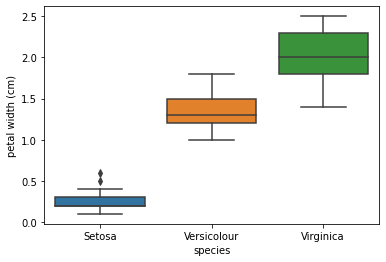

In [85]:
#create boxplot
_ = sns.boxplot(x='Target_Text', y='petal width (cm)', data=full_df)

#label the axis
_ = plt.xlabel('species')
_ = plt.ylabel('petal width (cm)')

#show the plot
plt.show()

*Part 4*

---



### **Wine Dataset**

In [86]:
#load the wine data set
wine = datasets.load_wine()

In [87]:
#show the information in this data set
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [88]:
#show a description of the data set
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [89]:
#function that uses 0, 1 and 2 as indicatives for each class
def simple_fn_test(x): 
  d = {0: 'Class_0', 1: 'Class_1', 2: 'Class_2'}
  return d[x]

In [90]:
#create a dataframe
#input variables or predicters - all the data is loaded as X
X = wine.data 

#plant species - all the targets as y
y = wine.target

#want to call the column names for corresponding x whichever are the feature names
df = pd.DataFrame(X, columns=wine.feature_names)

#create a deep copy of this dataframe 
full_df = df.copy(deep=True) 

#assign a new column to this data frame called target set the value from y
full_df['Target']=y

#create a new column and apply simple_fn_test
full_df['Target_Text'] = full_df.Target.apply(simple_fn_test) 

#display the dataframe
full_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,Target_Text
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,Class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,Class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,Class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,Class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,Class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,Class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,Class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,Class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,Class_2


### **Strategies**

**Strategy 1 : Statistical - Pairplot (takes a few seconds to load (100s))** 

*Why pairplot?* 

In the wine dataset description, there is no information about the correlations. Although the code takes a few seconds to run, the resulting plots are very useful for finding out which attributes have a positive correlation and is more likely able to distinguish between the the three classes. 

*Observation/Interpretation:*

There are two plots that show a obvious positive correlation. This is the relationship between flavanoids and total phenols. Therefore, based on this pairplot, either one of those attributes can be used to distinguish between the three classes.
 

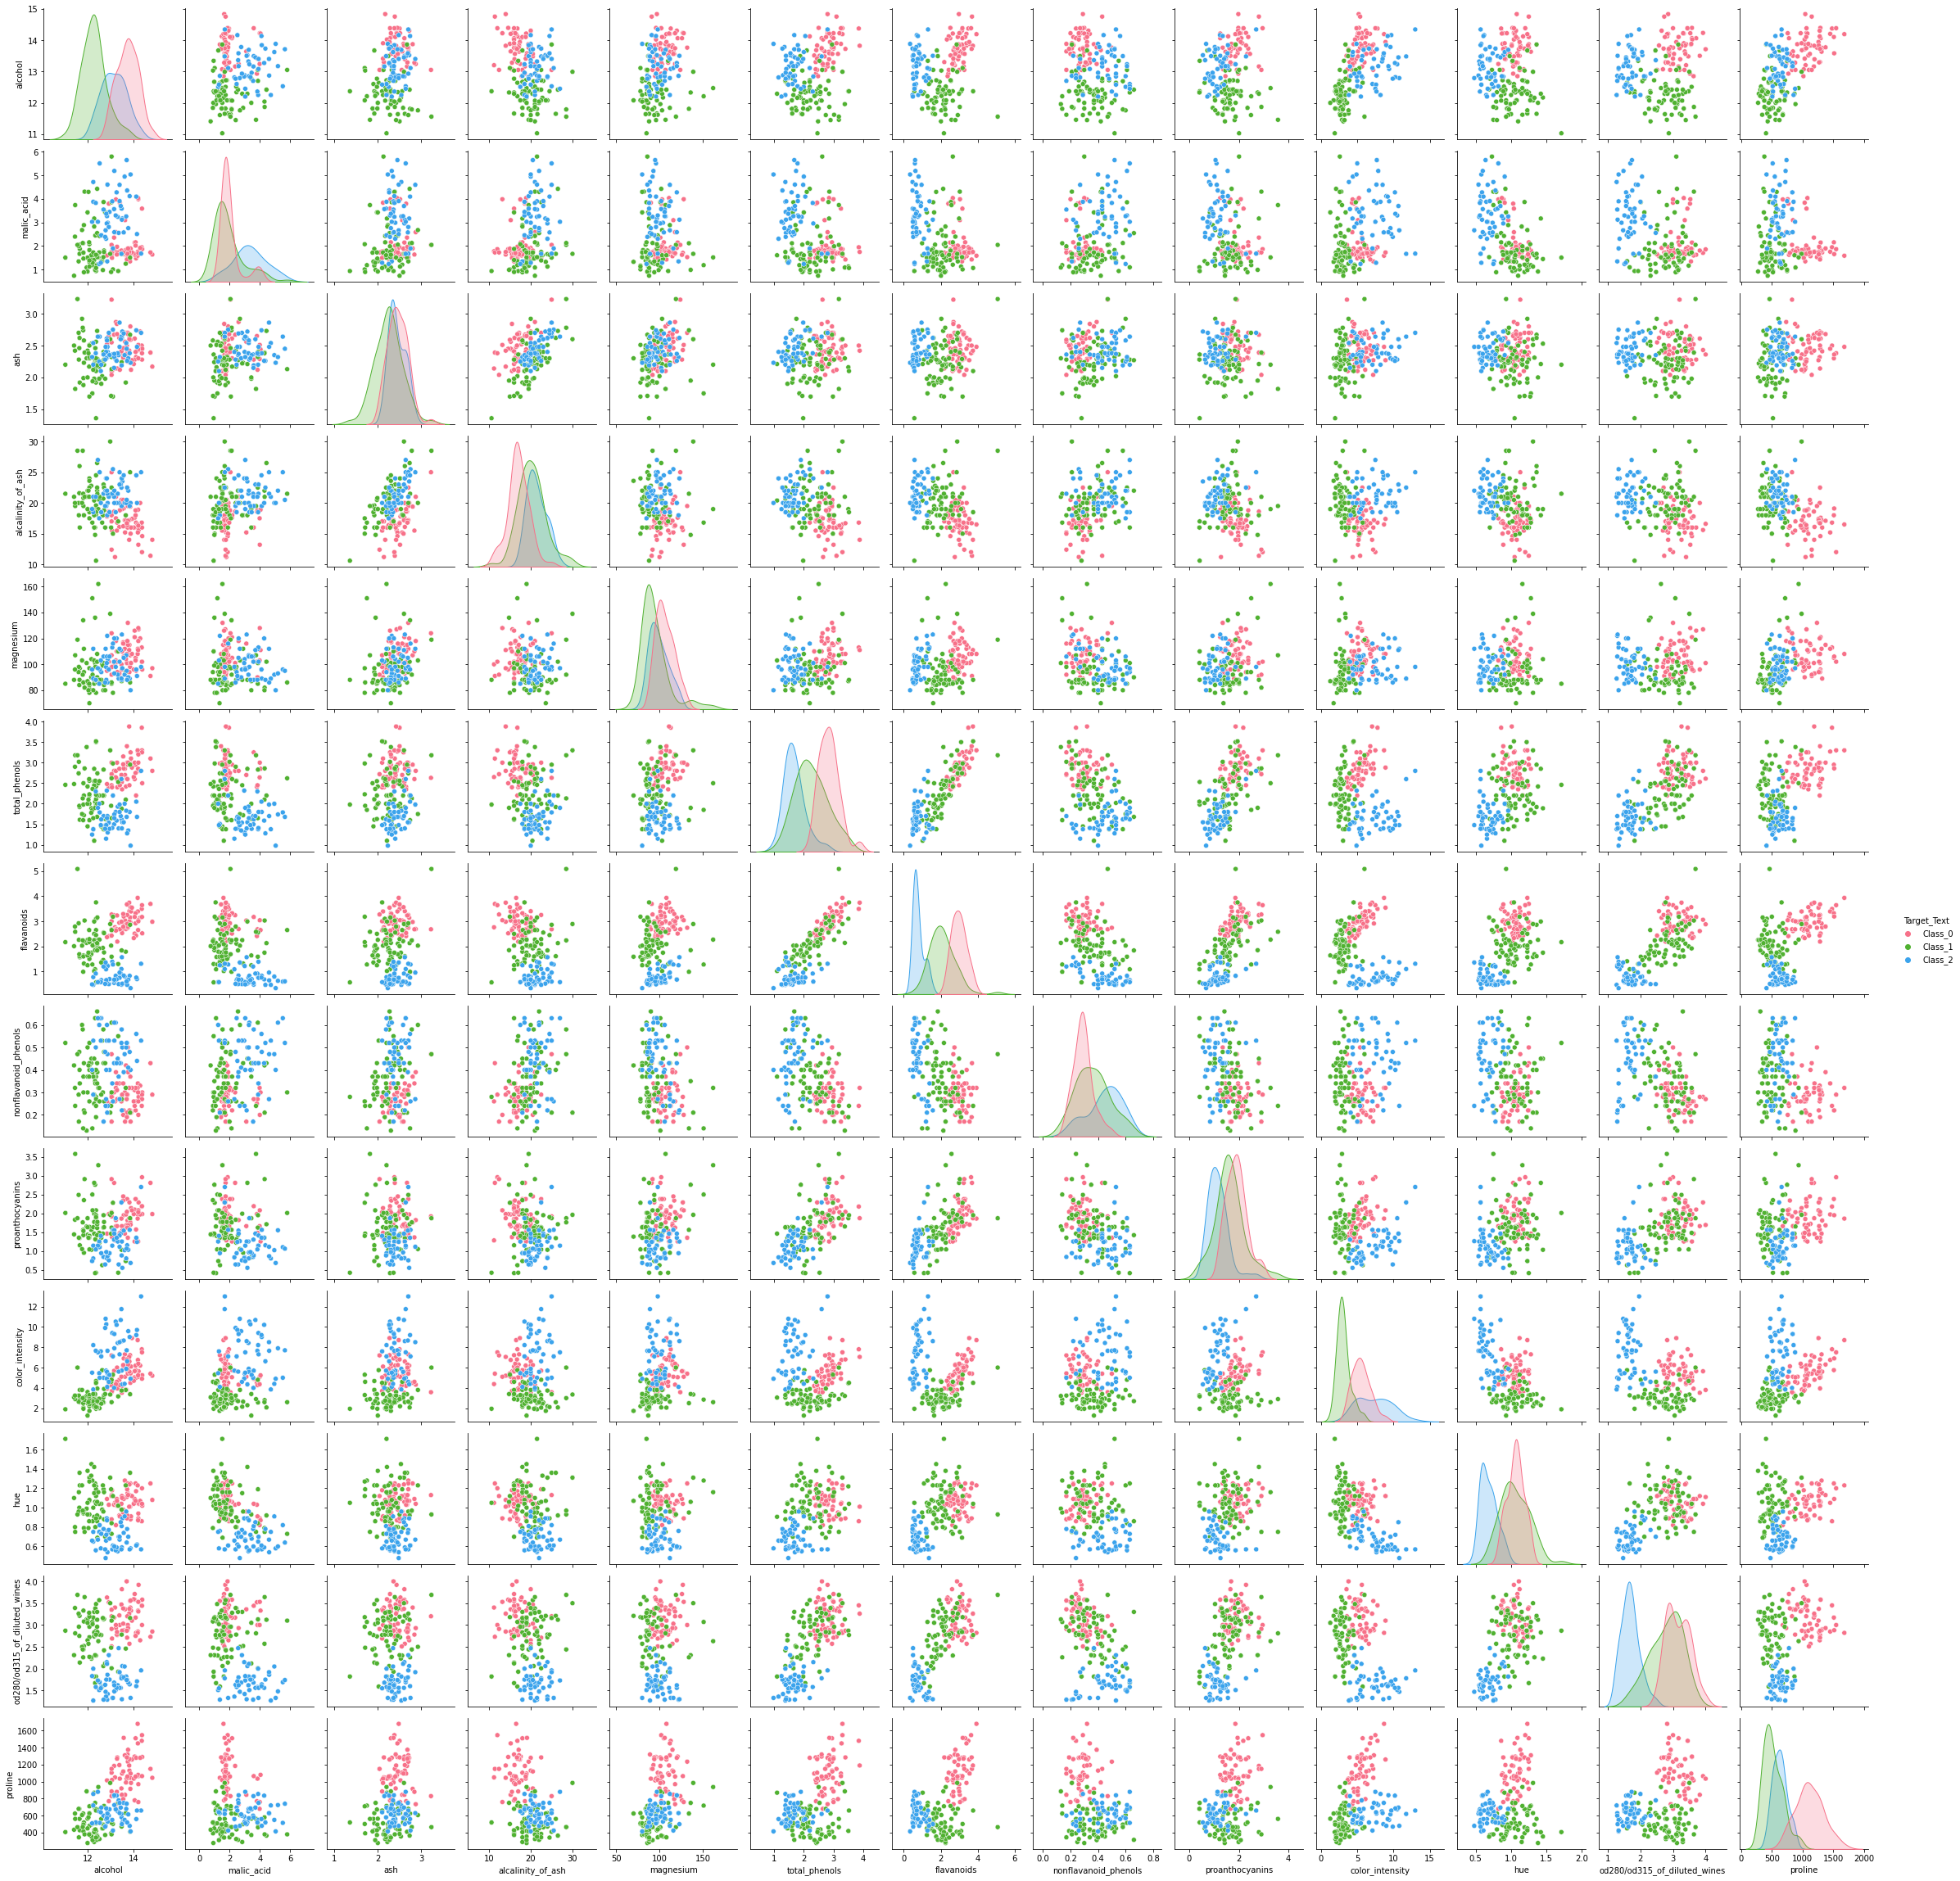

In [91]:
#show pairplot
sns.pairplot(full_df,hue='Target_Text', palette="husl", vars=['alcohol', 'malic_acid', 'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue',	'od280/od315_of_diluted_wines',	'proline']);

**Strategy 2: Graphical - Bee Swarm Plot**

*Why bee swarm?*

Bee swarm plots are good at showing overlaps and where they might be. As can be seen in the above pairplot, there are overlaps between all the classes. It is important to see the bigger picture because it helps when and if decisions have to be made.

*Observation/Interpretation:*

There are quite a few overlaps between the classes, however, judging by where the majority of points are located differentiating between classes can still be possible.

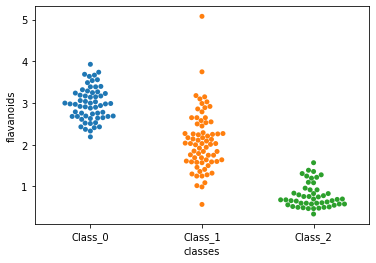

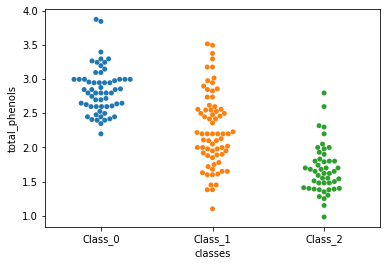

In [92]:
#create a bee swarm plot for flavanoids
_ = sns.swarmplot(x='Target_Text', y='flavanoids', data=full_df) 

#label the axis
_ = plt.xlabel('classes')
_ = plt.ylabel('flavanoids')

#show the plot
plt.show()

#create a bee swarm plot for total phenols
_ = sns.swarmplot(x='Target_Text', y='total_phenols', data=full_df)

#label the axis
_ = plt.xlabel('classes')
_ = plt.ylabel('total_phenols')

#show the plot
plt.show()

**Strategy 3: Statistical - Boxplot**

*Why boxplot?*

When in doubt whether an overlap can alter the chances of being able to differentiate, a box plot proves whether it is possible or not. The above bee swarm plot allows us to make a guess whether these attributes can still be used and not a definite observation.

*Observation/Interpretation:*

The resulting boxplot below shows that both attributes can be used to distinguish between classes because the interquartile ranges do not overlap for either attribute. What can also be seen are outliers. The outliers for flavanoids are around 5g and between 1g and 2g, for total phenols between 2.5g and 3g and between 3.5g and 4g.

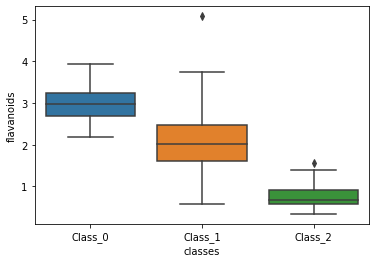

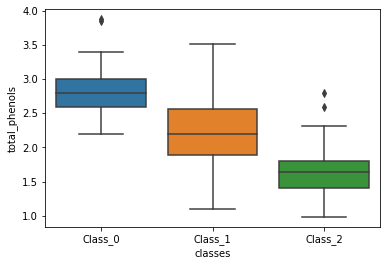

In [93]:
#create box plot for flavanoids
_ = sns.boxplot(x='Target_Text', y='flavanoids', data=full_df)

#label the axis
_ = plt.xlabel('classes')
_ = plt.ylabel('flavanoids')

#show the plot
plt.show()

#create box plot for total phenols
_ = sns.boxplot(x='Target_Text', y='total_phenols', data=full_df)

#label the axis
_ = plt.xlabel('classes')
_ = plt.ylabel('total_phenols')

#show the plot
plt.show()

In [94]:
#filter the data set into parts you are interested in - ie. flavanoids and total phenols

#Class_0
class0_flavanoids = full_df[full_df['Target'] == 0]['flavanoids'] 
class0_total_phenols = full_df[full_df['Target'] == 0]['total_phenols'] 

#Class_1
class1_flavanoids = full_df[full_df['Target'] == 1]['flavanoids'] 
class1_total_phenols = full_df[full_df['Target'] == 1]['total_phenols']  

#Class_2
class2_flavanoids = full_df[full_df['Target'] == 2]['flavanoids'] 
class2_total_phenols = full_df[full_df['Target'] == 2]['total_phenols']  

**Strategy 4: Graphical - Empirical Distribution Function**

*Why ECDF?*

ECDF can expand on the boxplot findings and prove correctness.It is useful to see two versions of a theory. In boxplot the percentiles are marked by a box but in ECDF it is a way to see actual points which represent those boxes. Outliers can also be seen better. It is also interesting to see that there are overlaps almost everywhere but that doesnt affect the findings above.

*Observation/Interpretation:*

Comparing the ecdf with the boxplot, they are both telling the same story. For flavanoids class one has a few outliers and for total phenols all attributes have a few outliers.

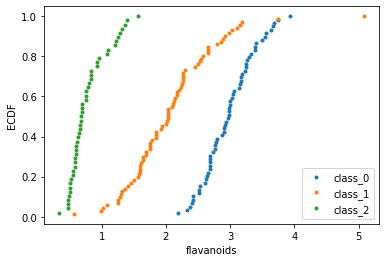

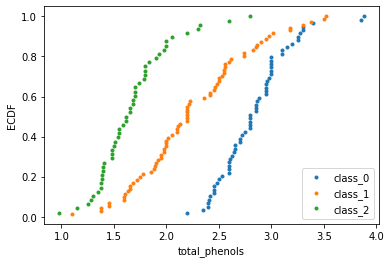

In [95]:
#compute ecdfs for flavanoids for all classes
x_class0, y_class0 = ecdf(class0_flavanoids) 
x_class1, y_class1 = ecdf(class1_flavanoids)
x_class2, y_class2 = ecdf(class2_flavanoids)

#plot ecdfs
plt.plot(x_class0, y_class0, marker='.', linestyle='none')
plt.plot(x_class1, y_class1, marker='.', linestyle='none')
plt.plot(x_class2, y_class2, marker='.', linestyle='none')

#labels
plt.legend(('class_0', 'class_1', 'class_2'), loc = 'lower right') 
_ = plt.xlabel('flavanoids')
_ = plt.ylabel('ECDF')

#display the plot
plt.show()

#compute ecdfs for total phenols for all classes
x_class0, y_class0 = ecdf(class0_total_phenols) 
x_class1, y_class1 = ecdf(class1_total_phenols)
x_class2, y_class2 = ecdf(class2_total_phenols)

#plot ecdfs
plt.plot(x_class0, y_class0, marker='.', linestyle='none')
plt.plot(x_class1, y_class1, marker='.', linestyle='none')
plt.plot(x_class2, y_class2, marker='.', linestyle='none')

#labels
plt.legend(('class_0', 'class_1', 'class_2'), loc = 'lower right') #loc is location of the box saying what each color is
_ = plt.xlabel('total_phenols')
_ = plt.ylabel('ECDF')

#display the plot
plt.show()

**Strategy 5: Statistical - Mean and Median**

*Why mean and median?*

To check if the mean is affected by these outliers discovered above.

*Observation/Interpretation:*

For flavanoids, in class 0, there are no outliers meaning that the median and mean are the same. For class 1 there arent many as there isnt a big difference. For class 2 there are a few outliers as the distance from the mean and median is bigger.

For total phenols the difference between the two is the same across all classes.

Mean: Class_0: 2.982372881355932
Median: Class_0: 2.98


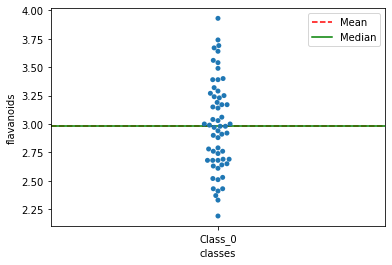

Mean: Class_1: 2.080845070422536
Median: Class_1: 2.03


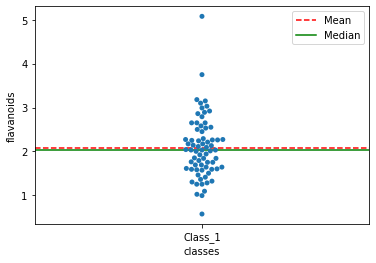

Mean: Class_2: 0.7814583333333331
Median: Class_2: 0.685


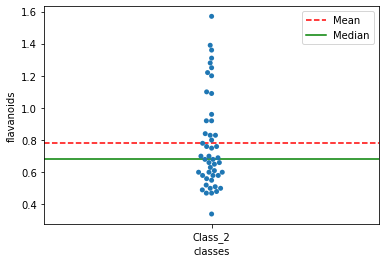

In [96]:
#find the mean and median for flavanoids - first class
mean_flavanoids_class0 = np.mean(class0_flavanoids)
median_flavanoids_class0 = np.median(class0_flavanoids)

#print the results
print('Mean: Class_0:', mean_flavanoids_class0)
print('Median: Class_0:', median_flavanoids_class0)

#create a bee swarm plot 
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='flavanoids', data=full_df[full_df['Target_Text'] == 'Class_0'])
ax.axhline(mean_flavanoids_class0, color='r', linestyle='--')
ax.axhline(median_flavanoids_class0, color='g', linestyle='-')

#label
plt.legend({'Mean':mean_flavanoids_class0, 'Median':median_flavanoids_class0})
_ = plt.xlabel('classes')
_ = plt.ylabel('flavanoids')

#show the plot
plt.show()

#find the mean and median for flavanoids - second class
mean_flavanoids_class1 = np.mean(class1_flavanoids)
median_flavanoids_class1 = np.median(class1_flavanoids)

#print the results
print('Mean: Class_1:', mean_flavanoids_class1)
print('Median: Class_1:', median_flavanoids_class1)

#create a bee swarm plot
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='flavanoids', data=full_df[full_df['Target_Text'] == 'Class_1'])
ax.axhline(mean_flavanoids_class1, color='r', linestyle='--')
ax.axhline(median_flavanoids_class1, color='g', linestyle='-')

#label
plt.legend({'Mean':mean_flavanoids_class1, 'Median':median_flavanoids_class1})
_ = plt.xlabel('classes')
_ = plt.ylabel('flavanoids')

#show the plot
plt.show()

#find the mean and median for flavanoids - third class
mean_flavanoids_class2 = np.mean(class2_flavanoids)
median_flavanoids_class2 = np.median(class2_flavanoids)

#print results
print('Mean: Class_2:', mean_flavanoids_class2)
print('Median: Class_2:', median_flavanoids_class2)

#create a bee swarm plot
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='flavanoids', data=full_df[full_df['Target_Text'] == 'Class_2'])
ax.axhline(mean_flavanoids_class2, color='r', linestyle='--')
ax.axhline(median_flavanoids_class2, color='g', linestyle='-')

#label
plt.legend({'Mean':mean_flavanoids_class2, 'Median':median_flavanoids_class2})
_ = plt.xlabel('classes')
_ = plt.ylabel('flavanoids')

#show the plot
plt.show()

Mean: Class_0: 2.8401694915254234
Median: Class_0: 2.8


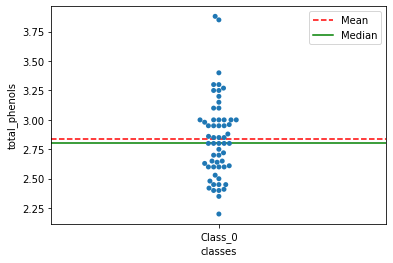

Mean: Class_1: 2.2588732394366198
Median: Class_1: 2.2


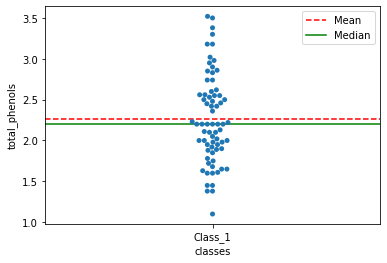

Mean: Class_2: 1.6787500000000002
Median: Class_2: 1.635


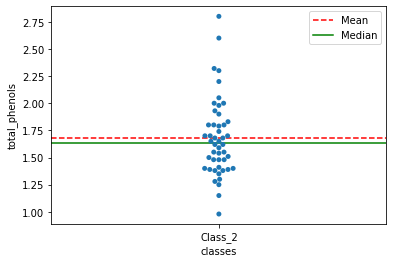

In [97]:
#find the mean and median for total phenols - first class
mean_total_phenols_class0 = np.mean(class0_total_phenols)
median_total_phenols_class0 = np.median(class0_total_phenols)

#print the results
print('Mean: Class_0:', mean_total_phenols_class0)
print('Median: Class_0:', median_total_phenols_class0)

#create a bee swarm plot
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='total_phenols', data=full_df[full_df['Target_Text'] == 'Class_0'])
ax.axhline(mean_total_phenols_class0, color='r', linestyle='--')
ax.axhline(median_total_phenols_class0, color='g', linestyle='-')

#label
plt.legend({'Mean':mean_total_phenols_class0, 'Median':median_total_phenols_class0})
_ = plt.xlabel('classes')
_ = plt.ylabel('total_phenols')

#show the plot
plt.show()

#find the mean and median for total phenols - second class
mean_total_phenols_class1 = np.mean(class1_total_phenols)
median_total_phenols_class1 = np.median(class1_total_phenols)

#print the results
print('Mean: Class_1:', mean_total_phenols_class1)
print('Median: Class_1:', median_total_phenols_class1)

#create a bee swarm plot
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='total_phenols', data=full_df[full_df['Target_Text'] == 'Class_1'])
ax.axhline(mean_total_phenols_class1, color='r', linestyle='--')
ax.axhline(median_total_phenols_class1, color='g', linestyle='-')

#label
plt.legend({'Mean':mean_total_phenols_class1, 'Median':median_total_phenols_class1})
_ = plt.xlabel('classes')
_ = plt.ylabel('total_phenols')

#show the plot
plt.show()

#find the mean and median for total phenols - third class
mean_total_phenols_class2 = np.mean(class2_total_phenols)
median_total_phenols_class2 = np.median(class2_total_phenols)

#print the results
print('Mean: Class_2:', mean_total_phenols_class2)
print('Median: Class_2:', median_total_phenols_class2)

#create a bee swarm plot
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='total_phenols', data=full_df[full_df['Target_Text'] == 'Class_2'])
ax.axhline(mean_total_phenols_class2, color='r', linestyle='--')
ax.axhline(median_total_phenols_class2, color='g', linestyle='-')

#label
plt.legend({'Mean':mean_total_phenols_class2, 'Median':median_total_phenols_class2})
_ = plt.xlabel('classes')
_ = plt.ylabel('total_phenols')

#show the plot
plt.show()

**Strategy 6 - Researched - Heatmap**

*Why heatmap?*

This strategy is similar to the pairplot. It shows the highest and lowest correlations between two attributes. I chose heatmap because I was curious to see if it gives a similar outcome and if it is more efficient than the pairplot.

*Observation/Interpretation:*

When running the code it is deffinitely faster than the pairplot. It took the pairplot 100 seconds to process and it took the heatmap 1.8 seconds. It is also faster to find the correlations because of the colour codes. The positive correlations are darker in colour as they are stronger. Flavanoids and total phenols are still higher. 

Ref(Waskom, n.d.)(Katari, 2020)

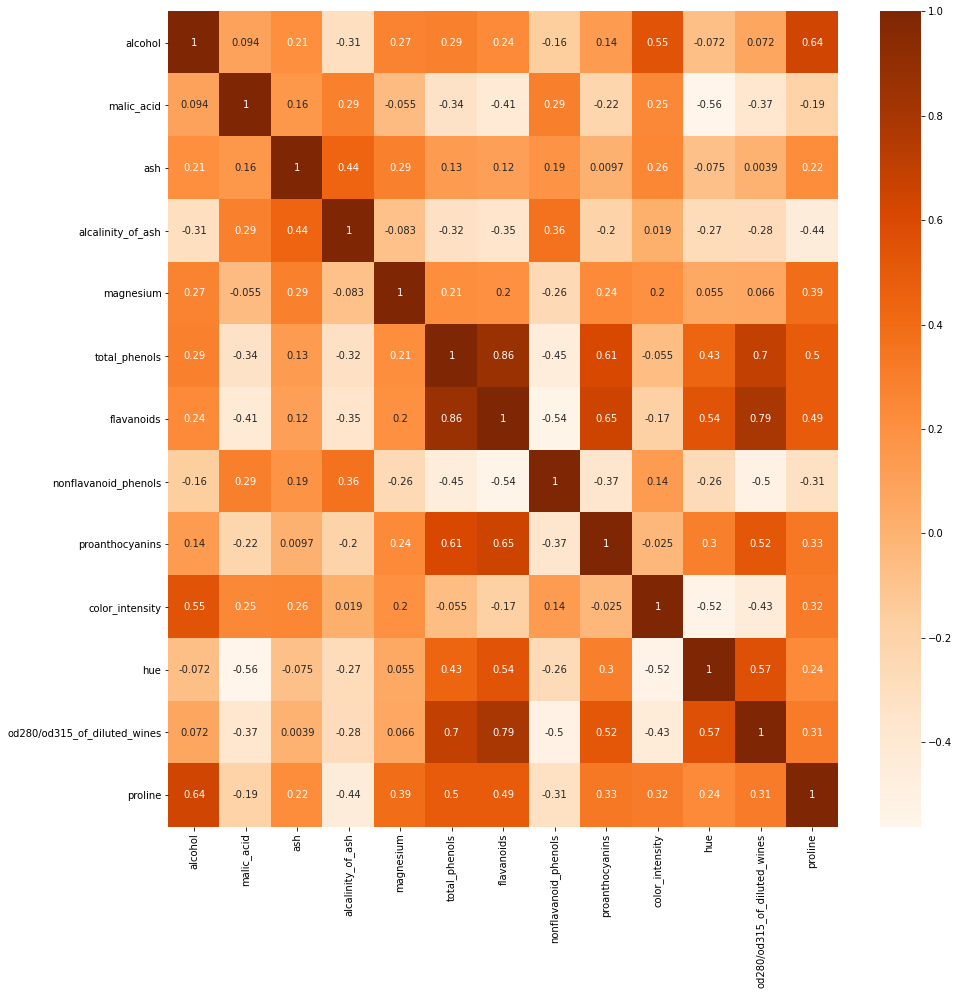

In [98]:
#give a specified size otherwise values overlap
plt.figure(figsize=(15,15))

#plot the correlation of the values
sns.heatmap(full_df[['alcohol', 'malic_acid', 'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue',	'od280/od315_of_diluted_wines',	'proline']].corr(), annot=True, cmap = 'Oranges')
plt.show()

**References**

YouTube. 2019. Data Scientist Vs Data Analyst: What's The Difference?. [online] Available at: <https://www.youtube.com/watch?v=mcy2dQ3v6R4&feature=emb_title>.

Waskom, M., n.d. Seaborn.Heatmap — Seaborn 0.11.0 Documentation. [online] Seaborn.pydata.org. Available at: <https://seaborn.pydata.org/generated/seaborn.heatmap.html>.

Katari, K., 2020. Exploratory Data Analysis(EDA): Python. [online] Towards Data Science. Available at: <https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14>.

